In [95]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import signal, ndimage, interpolate, stats
from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
font = {'family' : 'sans-serif',
        'size'   : 20}
from matplotlib.ticker import FormatStrFormatter


plt.rc('font', **font)

from pathlib import Path
import os,sys
import h5py
import sys 

from circus.shared.parser import CircusParser
from circus.shared.files import load_data
import time

import nept
sys.path.append('../PreProcessing/')  
sys.path.append('../TrackingAnalyses/')  
sys.path.append('../Lib/')
import pre_process_neuralynx as PPN
from filters_ag import *

from importlib import reload  # Python 3.4+ only.
import TreeMazeFunctions as TMF

PPN=reload(PPN)
TMF=reload(TMF)

In [96]:
# path to tracking data
evPath = '/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418/Events.nev'
ev = PPN.get_events(evPath)
tp=np.round(np.arange(ev['Start'],ev['Stop'],0.02)*1000)/1000
_,EventMat = TMF.getEventMatrix(ev,tp)

In [97]:
EventMat

,RH,RC,R1,R2,R3,R4,RG,AR,DH,DC,...,L2,L3,L4,CL,CR,TrID,cTr,iTr,LDs,RDs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# path to tracking data
datPath = '/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418_Results/ev.h5'

In [3]:
def readEv(datPath):
    f = h5py.File(datPath, 'r')
    Ev = {}
    for k  in f.keys():
        Ev[k]=np.array(f[k])
    return Ev

In [4]:
ev = readEv(datPath)
datPath = '/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418/Events.nev'
x=nept.load_nev(datPath)
raw_e=[]
raw_t=[]
for ii in np.arange(len(x)):
    raw_e.append(x['event_str'][ii].decode())
    raw_t.append(x['time'][ii].astype(float) * 1e-6)

In [5]:
def isnear(X,Y,thr,):
    '''Find x,y points within the thr'''
    x_out= np.full_like(X, -1)
    y_out= np.full_like(Y, -1)
    match_cnt=1
    cnt1=0
    for x in X:
        cnt2=0
        for y in Y:
            if abs(x-y)<=thr:
                x_out[cnt1]=match_cnt
                y_out[cnt2]=match_cnt
                match_cnt+=1
            cnt2+=1
        cnt1+=1
    return x_out,y_out

def isClosest(t,X):
    '''Find closest sample in t that matches X'''
    t_out= np.full_like(t, -1)
    cnt1=1
    for x in X:
        idx = np.argmin(np.abs(t-x))
        if x-t[idx]>=0:
            t_out[idx]=cnt1
        else: # always assign to the earliest sample
            t_out[idx-1]=cnt1
        cnt1+=1
    return t_out

def isbefore(X,Y,thr,minTime=0):
    '''Find x,y points within the thr and such that x happens before y'''
    x_out= np.full_like(X, -1)
    y_out= np.full_like(Y, -1)
    match_cnt=0
    cnt1=0
    for x in X:
        cnt2=0
        for y in Y:
            if y-x<=thr and y-x>=minTime:
                x_out[cnt1]=match_cnt
                y_out[cnt2]=match_cnt
                match_cnt+=1
                break
            cnt2+=1
            
        cnt1+=1
    return x_out,y_out

def getRewardStamps(wellnum, ev):
    x1,x2=isnear(ev['DE'+str(wellnum)],ev['RD'],0.01)
    return ev['RD'][x2>0]


In [6]:
def makeEventVector(evTimes,evDurs,t):
    ''' 
    Creates binary vector of length len(t). It takes a list of event times, 
    assigns them to the regularly sampled time vector 't', and returns a vector
    that has ones in the times of the events, and extends the events for evDurs. 
    Note that evDurs can either be a vector of the same length as evTimes, or a fixed duration time.
    
    Inputs:
        evTimes -> list of times of the events
        evDurs  -> list of times of the duration of events in evTimes
                    or the number of Samples that the event lasts
        t       -> regularly sampled time vector that covers the length of a recording.
    Outputs:
        evVec   -> binary vector of length len(t), that is one for in the event 
                    times plus the evDur
    '''
    N = len(t)
    nEvents = len(evTimes)
    tt = isClosest(t,evTimes)
    if type(evDurs)==int:
        evVec=signal.lfilter(np.ones(evDurs),1,tt>0)
        evVec[evVec>1]=1
        return evVec
    elif nEvents == len(evDurs):
        locs = np.where(tt>0)[0]
        evVec = np.zeros(N)
        for i in np.arange(nEvents):
            idx = np.arange(locs[i],locs[i]+evDurs[i])
            evVec[idx]=1
        return evVec
    else:
        print('Event and Event Duration mismatch')
        return []

In [8]:
def getTrialsAndCueDurations(ev,t):
    '''
    Function to obtain durations of the left and right cues,and trial outcome based on termination criteria. 
    Criteria is based on reward events or detections at incorrect wells. Exit case also includes
    the start of another trial.
    
    Inputs:
        ev -> event directory. This must already include Reward events through the 
        'getRewardStamps' function
        t -> regularly sampled time vector that covers the length of a recording
    Outputs:
        CueDurSamps -> dict of cue durations in samples
        TrialEvents > dict of trial start times and post correct/incorrect trial times

    '''
    tBegin = t[0]
    tEnd = t[-1]
    step = t[1]-t[0]
    
    nLCues = len(ev['CL'])
    nRCues = len(ev['CR'])
    
    AllCues = np.concatenate((np.ones(nLCues),1+np.ones(nRCues)))
    AllCuesTimes = np.concatenate((ev['CL'],ev['CR']))
    SortedCueIDs = np.argsort(AllCuesTimes)
    SortedCueTimes = AllCuesTimes[SortedCueIDs]
    SortedCues = AllCues[SortedCueIDs]
    nCues = nLCues+nRCues

    AllTrialStarts = np.array(SortedCueTimes)
    CorrectTrials  = []
    InCorrectTrials  = []
    
    nL = 0
    nR = 0
    rightDurs = np.zeros(nRCues)
    leftDurs = np.zeros(nLCues)
    for c in np.arange(nCues):
        t0=SortedCueTimes[c]
        if c==(nCues-1):
            t1=tEnd
        else:
            t1=SortedCueTimes[c+1]
        match = 0
        if SortedCues[c] == 1: # left
            for end_Ev in ['RW5','RW6','DE3','DE4']:
                end_Ev_id = np.logical_and(ev[end_Ev]>=t0,ev[end_Ev]<t1)
                if any(end_Ev_id):
                    tE = ev[end_Ev][end_Ev_id][0]
                    leftDurs[nL] = tE-t0
                    match = 1
                    if end_Ev in ['RW5','RW6']:
                        CorrectTrials.append(tE)
                    else:
                        InCorrectTrials.append(tE)
                    break
            if match==0:
                leftDurs[nL] = t1-t0     
            nL+=1 # note that multiple matches will override....
        elif SortedCues[c]==2: # right
            for end_Ev in ['RW3','RW4','DE5','DE6']:
                end_Ev_id = np.logical_and(ev[end_Ev]>=t0,ev[end_Ev]<t1)
                if any(end_Ev_id):
                    tE = ev[end_Ev][end_Ev_id][0]
                    rightDurs[nR] = tE-t0
                    match = 1
                    if end_Ev in ['RW3','RW4']:
                        CorrectTrials.append(tE)
                    else:
                        InCorrectTrials.append(tE)
                    break                    
            if match==0:
                rightDurs[nR] = t1-t0
                InCorrectTrials.append(t1)
            nR+=1 # note that multiple matches will override....

    CueDurSamps = {}
    CueDurSamps['CL']=np.round(leftDurs/step).astype(int)    
    CueDurSamps['CR']=np.round(rightDurs/step).astype(int)
    
    TrialEvents = {}
    TrialEvents['Tr']  = AllTrialStarts
    TrialEvents['cTr'] = CorrectTrials
    TrialEvents['iTr'] = InCorrectTrials
    return CueDurSamps, TrialEvents

In [11]:
def getLEDDurations(ev,step):
    '''
    Function to obtain durations of the LEDs, based on termination criteria.
    Criteria is based on reward events or detections at incorrect wells. Exit case also includes
    the start of another trial. Note that this code would Only be applicable for T3 sessions.
    
    Inputs:
        ev -> event directory. This must already include Reward events through the 
        'getRewardStamps' function
        step -> time step to convert time to samples
    Outputs:
        LED_Durs -> directory of durations in samples for the different LEDs
    '''
    
    nWells = 6
    defDurTime = 0.5
    nLED_Ev = np.zeros(nWells,dtype=int)
    LED_Durs = {}
    defDur = np.round(defDurTime/step).astype(int)
    
    EndCriteria = {'L1':['RW1'],'L2':['RW2'],
                    'L3':['RW3','DE5','DE6'],'L4':['RW4','DE5','DE6'],
                    'L5':['RW5','DE3','DE4'],'L6':['RW6','DE3','DE4']}
    
    for well in np.arange(nWells):
        L_ID = 'L' + str(well+1)
        nLED_Ev[well] = len(ev[L_ID])
        LED_Durs[L_ID] = np.zeros(nLED_Ev[well],dtype=int)
        if nLED_Ev[well] > 0:
            
            # get event matches for all end criteria events
            all_matches = {}
            for eC in EndCriteria[L_ID]:            
                all_matches[eC] = isbefore(ev[L_ID],ev[eC],200,minTime=0.01)

            #print(nLED_Ev[well],np.arange(nLED_Ev[well]))
            for eID in np.arange(nLED_Ev[well]):
                t0 = ev[L_ID][eID]

                # select minimum end criteria event
                trueMatchFlag =0
                t1 = t0+500
                for eC in EndCriteria[L_ID]:                    
                    if any(all_matches[eC][1]==eID):
                        t1 = min(t1,ev[eC][all_matches[eC][1]==eID][0])                        
                        trueMatchFlag=1

                if trueMatchFlag:
                    LED_Durs[L_ID][eID] = np.round((t1-t0)/step).astype(int)
                else:
                    LED_Durs[L_ID][eID] = defDur
    return LED_Durs



In [21]:
tBegin = raw_t[0]
tEnd = raw_t[-1]
step = 0.02
t = np.arange(tBegin,tEnd,step)
nTimePoints = len(t)

# get reward time stamps
for well in np.arange(1,7,dtype=int):
    ev['RW'+str(well)]=getRewardStamps(well, ev)   

CueDurSamps, TrialEvents = getTrialsAndCueDurations(ev,t)
LED_Durs = getLEDDurations(ev,step)

ReLength = 0.5 # in seconds
NReSamps = np.int(ReLength/step) # samples to extend the reward markers
    
DeLength = 0.1 # in seconds
NDeSamps = np.int(DeLength/step)

PostTrialDur = 1
NPostTrialSamps = np.int(PostTrialDur/step)

nEventTypes = 22
EventMat = np.zeros((nTimePoints,nEventTypes))
cnt = 0
for e in ['RW','DE']:
    for i in np.arange(1,7):
        if e=='RW':
            EventMat[:,cnt] = makeEventVector(ev[e+str(i)],NReSamps,t)
        elif e=='DE':
            EventMat[:,cnt] = makeEventVector(ev[e+str(i)],NDeSamps,t)            
        cnt+=1
for e in LED_Durs.keys():
    EventMat[:,cnt] = makeEventVector(ev[e],LED_Durs[e],t)
    cnt+=1
for e in CueDurSamps.keys():
    EventMat[:,cnt] = makeEventVector(ev[e],CueDurSamps[e],t)
    cnt+=1
EventMat[:,cnt] = makeEventVector(TrialEvents['cTr'],NPostTrialSamps,t)
EventMat[:,cnt+1] = makeEventVector(TrialEvents['iTr'],NPostTrialSamps,t)
    
EventNames = ['RH','RD','R1','R2','R3','R4','R','RG','DH','DD','D1','D2','D3','D4',
             'LH','LD','L1','L2','L3','L4','CL','CR','cTr','iTr']


In [19]:
CueDurSamps, TrialEvents = getTrialsAndCueDurations(ev,t)


In [20]:
TrialEvents

{'Tr': array([ 904.006711,  921.988516,  944.375945,  967.864592,  989.012333,
        1007.752107, 1030.401942, 1049.84859 , 1062.938741, 1074.487705,
        1091.337917, 1105.370536, 1119.240187, 1139.334117, 1152.963861,
        1170.951791, 1202.250341, 1221.05374 , 1237.419608, 1254.564258,
        1275.592374, 1292.138149, 1308.788486, 1327.999697, 1351.038438,
        1367.353244, 1386.080299, 1410.936726, 1434.005998, 1447.288274,
        1462.140799, 1477.838481, 1494.033943, 1512.507279, 1530.725834,
        1545.297641, 1557.834917, 1580.198096, 1598.360307, 1611.977177,
        1627.878952, 1644.012789, 1664.664906, 1680.82518 , 1695.790049,
        1709.79195 , 1725.7086  , 1738.766876, 1752.678808, 1763.954866,
        1780.661265, 1795.447134, 1807.030942, 1822.505217, 1836.95218 ,
        1850.821737, 1865.1702  , 1882.253662, 1893.859126, 1906.313934,
        1918.69746 , 1931.665986, 1949.250229, 1967.967003, 1985.299464,
        1999.452553, 2011.91636 , 2028.182228

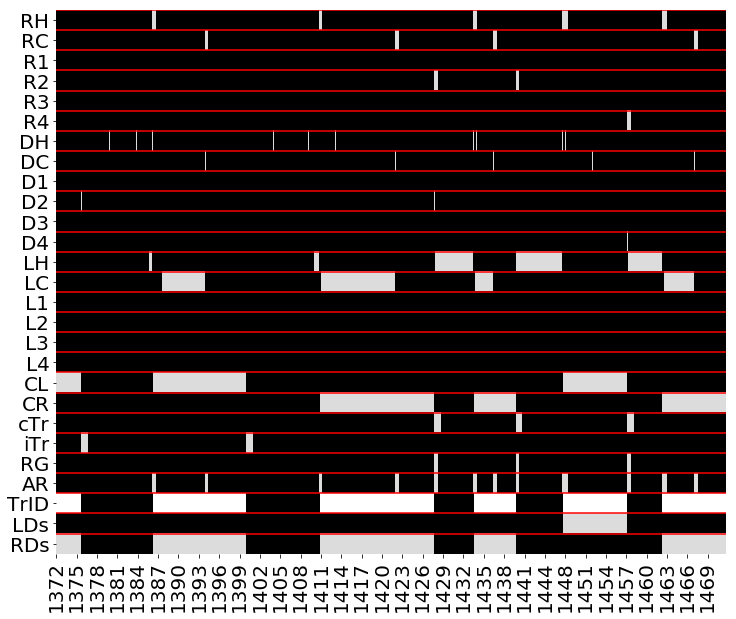

In [86]:
window = np.arange(5000)+5000*5
f,a1=plt.subplots(1,1, figsize=(12,10))

sns.heatmap(EventMat.as_matrix()[window,:].T,yticklabels=TMF.EventNames,ax=a1,cbar=0,cmap='Greys_r',vmax=1.3)
a1.hlines(np.arange(TMF.nEventTypes), *a1.get_xlim(),color='red')
#a1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
x=a1.get_xticks().astype(int)
_=a1.set_xticklabels(np.round(tp[window[x]]).astype(int))

In [78]:
EventMat.columns

Index(['RH', 'RC', 'R1', 'R2', 'R3', 'R4', 'DH', 'DC', 'D1', 'D2', 'D3', 'D4',
       'LH', 'LC', 'L1', 'L2', 'L3', 'L4', 'CL', 'CR', 'cTr', 'iTr', 'RG',
       'AR', 'TrID', 'LDs', 'RDs', 'R5', 'R6', 'D5', 'D6', 'L6', 'cTR'],
      dtype='object')

Text(0,0.5,'Sample Counts')

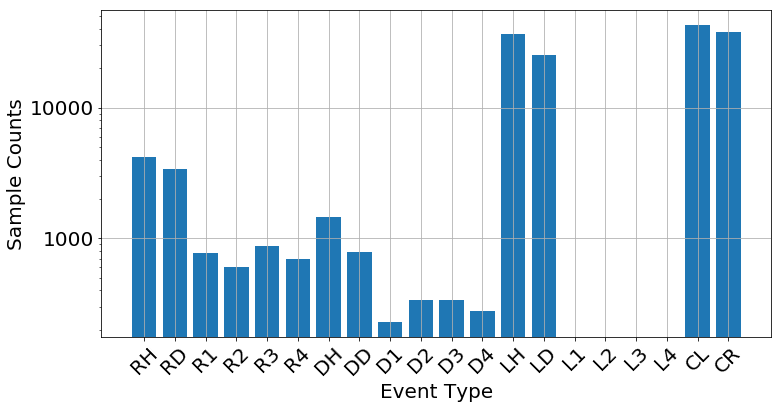

In [444]:
f,a1=plt.subplots(1,1, figsize=(12,6))
counts = np.sum(EventMat,0)
a1.bar(np.arange(nEventTypes), counts)
a1.set_yscale('log')
#a1.set_yticks([x*1000 for x in [1,4,10,40]])
a1.set_xticks(np.arange(nEventTypes))
a1.set_xticklabels(EventNames)
a1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
a1.grid()

for tick in a1.get_xticklabels():
    tick.set_rotation(45)

a1.set_xlabel('Event Type')
a1.set_ylabel('Sample Counts')


Text(0,0.5,'Event Counts')

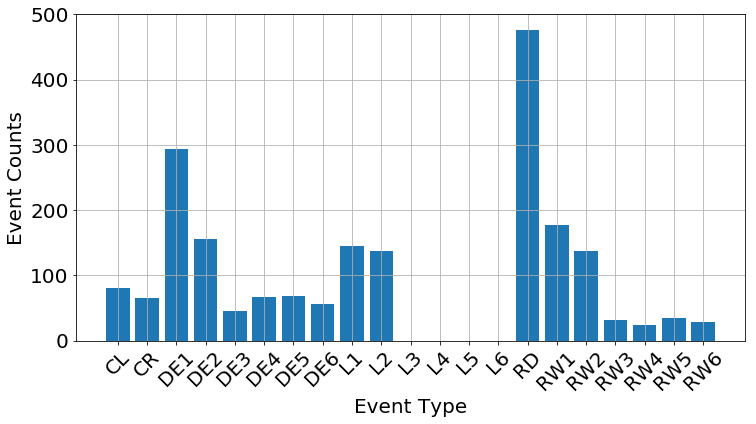

In [440]:
d = {}
for x in ev.keys():
    d[x] = len(ev[x])

f,a1=plt.subplots(1,1, figsize=(12,6))
ne = len(d)
counts = d.values()
a1.bar(np.arange(ne), counts)
#a1.set_yscale('log')
a1.set_xticks(np.arange(ne))
a1.set_xticklabels(d.keys())
a1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
a1.grid()

for tick in a1.get_xticklabels():
    tick.set_rotation(45)

a1.set_xlabel('Event Type')
a1.set_ylabel('Event Counts')

Text(0,0.5,'Detection to Reward Ratio')

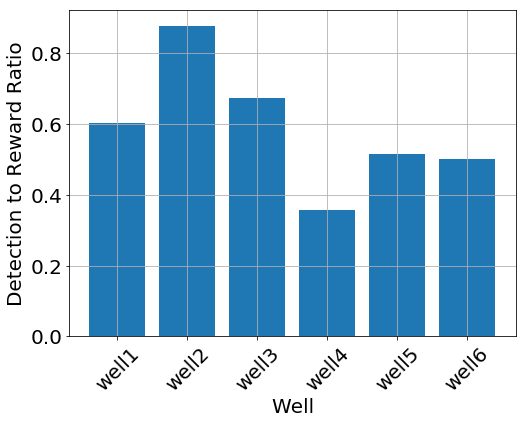

In [443]:
nWells=6
ratio = np.zeros(nWells)
for w in np.arange(nWells):
    ratio[w] = d['RW'+str(w+1)]/d['DE'+str(w+1)]

f,a1=plt.subplots(1,1, figsize=(8,6))
a1.bar(np.arange(nWells), ratio)
a1.set_xticks(np.arange(nWells))
a1.set_xticklabels(['well'+str(x+1) for x in np.arange(nWells)])
a1.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
a1.grid()

for tick in a1.get_xticklabels():
    tick.set_rotation(45)

a1.set_xlabel('Well')
a1.set_ylabel('Detection to Reward Ratio')

Unsure if I'll use this function below, but just leaving it here as a possible way to separate trials, based on rewards to the first well.

In [11]:
#def findTrialMarkers(RW,raw_e,raw_i):
x = ev['RW1']
nRW1 = len(x)
Trials = []
Times = []
for id0 in np.arange(nRW1-1):
    id1 = id0+1
    t0 = x[id0]
    t1 = x[id1]
    if t1-t0>1:
        raw_IDs = np.where(np.logical_and(raw_t>=t0,raw_t<t1))[0]
        Trials.append(raw_e[raw_IDs[0]:raw_IDs[-1]])
        Times.append(raw_t[raw_IDs[0]:raw_IDs[-1]])

LCueTrials = []
RCueTrials = []
Others = []
for tr_id in np.arange(len(Trials)):
    if 'CL' in Trials[tr_id]:
        LCueTrials.append(tr_id)
    if 'CR' in Trials[tr_id]:
        RCueTrials.append(tr_id)
    if not (('CL' in  Trials[tr_id]) or ('CR' in  Trials[tr_id])):
        Others.append(tr_id)
    